In [ ]:
!pip install mtcnn

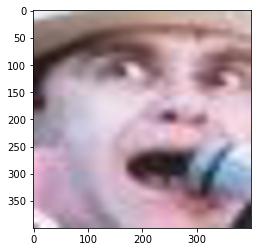

In [ ]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
 
def extract_face(filename, required_size=(400, 400)):
	pixels = pyplot.imread(filename)
	detector = MTCNN()
	results = detector.detect_faces(pixels)
	x1, y1, width, height = results[0]['box']
	x2, y2 = x1 + width, y1 + height
	face = pixels[y1:y2, x1:x2]
	image = Image.fromarray(face)
	image = image.resize(required_size)
	face_array = asarray(image)
	return face_array
 
pixels = extract_face('httpftqncomymusicLxZeltonjohnjpg.jpg')
pyplot.imshow(pixels)
pyplot.show()

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

parent = r'C:\UpworkProjects\Kaggle_Face_Recognition\archive (3)'

for folder in os.listdir(os.path.join(parent,'train')):
    images = os.listdir(os.path.join(parent,'train',folder))
    for ind,image in enumerate(images):
        print(folder,image)
        ext_img = extract_face(os.path.join(parent,'train',folder,image))
        ext_img = cv2.cvtColor(ext_img,cv2.COLOR_RGB2BGR)
        cv2.imwrite(os.path.join(parent,'extracted',folder,f"img{ind}.png"),ext_img)

ben_afflek httpcsvkmeuaeccjpg.jpg
ben_afflek httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg
ben_afflek httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg
ben_afflek httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg
ben_afflek httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg
ben_afflek httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg
ben_afflek httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg
ben_afflek httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg
ben_afflek httptrwebimgacstanetcxbdddmediasnmediajpg.jpg
ben_afflek httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg
ben_afflek httpwwwallposterscomimagesPostersPFjpg.jpg
ben_afflek httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg
ben_afflek httpwwwhillsindcomstorebenjpg.jpg
elton_john httpftqncomymusicLxZeltonjohnjpg.jpg
elton_john httpiamediaimdbcomimagesMMVBMTAxNDUMzUwOTdeQTJeQWpwZBbWUMDUOTAyNT

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.resnet import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import tensorflow as tf
from glob import glob

In [2]:
import os

In [3]:
IMAGE_SIZE = [224, 224]


In [7]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [8]:
!kaggle datasets download -d hereisburak/pins-face-recognition

 99% 367M/372M [00:02<00:00, 186MB/s]
100% 372M/372M [00:02<00:00, 177MB/s]


In [9]:
!unzip /content/pins-face-recognition.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner37_964.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner38_965.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner39_966.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner3_956.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner41_968.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner42_969.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner44_970.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner45_971.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner46_972.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner47_973.jpg  
  inflating: ./105_classes_pins_dataset/pins_Sophie Turner/Sophie Turner48_974.jpg  
  inflating: ./

In [10]:
import os
import cv2
import matplotlib.pyplot as plt

train_ratio = 0.8
test_ratio = 0.2
pre = r'/content/'
parent = '105_classes_pins_dataset'
dest = 'splitted_data'
# print(os.listdir(parent))

for folder in os.listdir(os.path.join(pre,parent)):
    if not os.path.exists(os.path.join(pre,dest,'train',folder)) and not os.path.exists(os.path.join(pre,dest,'test',folder)):
        os.makedirs(os.path.join(pre,dest,'train',folder))
        os.makedirs(os.path.join(pre,dest,'test',folder))
        
    images = os.listdir(os.path.join(pre,parent,folder))
    print(len(images))
    training_len = int(len(images)*0.8)
    for i,img in enumerate(images):
        timg = cv2.imread(os.path.join(pre,parent,folder,img))
        if i < training_len:
            cv2.imwrite(os.path.join(pre,dest,'train',folder,f"img{i}.png"),timg)
        else:
            cv2.imwrite(os.path.join(pre,dest,'test',folder,f"img{i}.png"),timg)
            

171
150
198
181
125
203
156
116
158
133
184
159
182
161
186
117
156
210
221
167
105
212
131
154
162
178
213
113
86
209
133
169
159
180
154
146
159
139
192
171
162
166
141
160
139
154
175
98
204
162
188
127
159
102
187
180
106
196
126
211
138
193
148
186
152
135
133
233
179
138
160
209
124
179
178
119
178
199
183
226
176
211
122
189
197
169
122
166
192
141
95
237
203
191
167
225
221
191
117
177
198
201
195
218
181


In [11]:
train_path = r"/content/splitted_data/train"
test_path = r"/content/splitted_data/test"

In [12]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58900480/58889256 [==============================] - 0s 0us/step


In [13]:
for layer in vgg16.layers:
    layer.trainable = False

In [14]:
folders = glob(r'/content/splitted_data/train/*')

In [15]:
folders

['/content/splitted_data/train/pins_Penn Badgley',
 '/content/splitted_data/train/pins_Lili Reinhart',
 '/content/splitted_data/train/pins_Natalie Dormer',
 '/content/splitted_data/train/pins_Danielle Panabaker',
 '/content/splitted_data/train/pins_Pedro Alonso',
 '/content/splitted_data/train/pins_Anne Hathaway',
 '/content/splitted_data/train/pins_Irina Shayk',
 '/content/splitted_data/train/pins_Neil Patrick Harris',
 '/content/splitted_data/train/pins_Elizabeth Lail',
 '/content/splitted_data/train/pins_Nadia Hilker',
 '/content/splitted_data/train/pins_Jason Momoa',
 '/content/splitted_data/train/pins_Chris Hemsworth',
 '/content/splitted_data/train/pins_Johnny Depp',
 '/content/splitted_data/train/pins_Marie Avgeropoulos',
 '/content/splitted_data/train/pins_Selena Gomez',
 '/content/splitted_data/train/pins_Amanda Crew',
 '/content/splitted_data/train/pins_Robert De Niro',
 '/content/splitted_data/train/pins_Emilia Clarke',
 '/content/splitted_data/train/pins_elizabeth olsen',
 

In [16]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [17]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [18]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [19]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
training_set = train_datagen.flow_from_directory(r"/content/splitted_data/train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 13979 images belonging to 105 classes.


In [22]:
test_set = test_datagen.flow_from_directory(r"/content/splitted_data/test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 3555 images belonging to 105 classes.


In [ ]:
model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
437/437 [==============================] - 274s 581ms/step - loss: 4.2806 - accuracy: 0.2070 - val_loss: 3.2620 - val_accuracy: 0.3269
Epoch 2/20
305/437 [===================>..........] - ETA: 1:06 - loss: 2.4488 - accuracy: 0.4502

In [ ]:
model.save("final_vgg16.h5")